### Projeto simulador de decisões em um ambiente simplificado, como um jogo de escolhas sequenciais onde um agente irá aprender a tomar decisões a partir da experiência, sem utilizar dados históricos rotulados. Diferentemente dos projetos anteriores, o aprendizado não ocorre por comparação com respostas corretas, mas pela observação das consequências das ações ao longo do tempo.

Import das bibliotecas

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(42)



Define o ambiente

In [ ]:
# Probabilidades reais de recompensa (o agente não conhece)
#o ambiente responde às ações
true_probs = np.array([0.2, 0.5, 0.8])  #máquina 0 é ruim, 1 média, 2 melhor
n_actions = len(true_probs)

def step(action):
    """
    Recebe uma ação (qual máquina o agente escolheu)
    e devolve uma recompensa: 1 (ganhou) ou 0 (não ganhou).
    """
    return 1 if np.random.rand() < true_probs[action] else 0


O que o agente "aprende'

In [ ]:
Q = np.zeros(n_actions)      #valor estimado de cada ação
N = np.zeros(n_actions)      #uantas vezes cada ação foi escolhida

#o agente vai manter uma estimativa para cada ação “quão boa essa máquina parece ser, baseado no que já vi”

Estratégia de aprendizado (epsilon-greedy)

In [ ]:
epsilon = 0.1  #10% das vezes ele explora aleatoriamente

def choose_action(Q, epsilon):
    if np.random.rand() < epsilon:
        return np.random.randint(len(Q))   #exploração
    return int(np.argmax(Q))               #aproveitamento


Treinamento

In [ ]:
T = 2000  #número de interações (rodadas)

rewards = []
chosen_actions = []

for t in range(T):
    action = choose_action(Q, epsilon)
    reward = step(action)

    #atualiza contadores
    N[action] += 1

    #atualização incremental (média das recompensas daquela ação)
    Q[action] = Q[action] + (reward - Q[action]) / N[action]

    rewards.append(reward)
    chosen_actions.append(action)


Visualizações

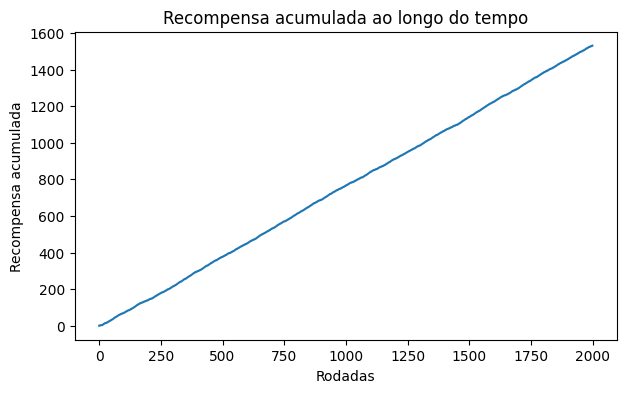

In [ ]:
cum_reward = np.cumsum(rewards)

plt.figure(figsize=(7,4))
plt.plot(cum_reward)
plt.title("Recompensa acumulada ao longo do tempo")
plt.xlabel("Rodadas")
plt.ylabel("Recompensa acumulada")
plt.show()


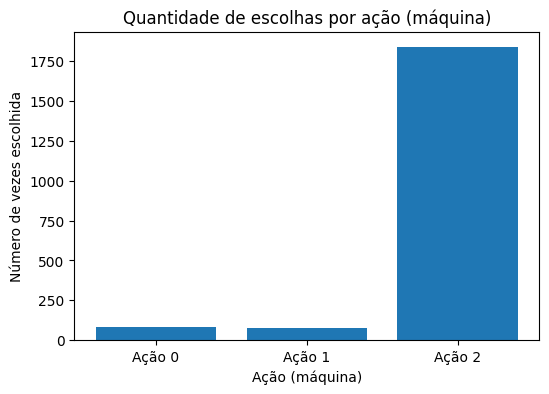

Probabilidades reais: [0.2 0.5 0.8]
Estimativas aprendidas (Q): [0.214 0.513 0.801]
Escolhas (N): [  84   78 1838]


In [ ]:
counts = np.bincount(chosen_actions, minlength=n_actions)

plt.figure(figsize=(6,4))
plt.bar(range(n_actions), counts)
plt.title("Quantidade de escolhas por ação (máquina)")
plt.xlabel("Ação (máquina)")
plt.ylabel("Número de vezes escolhida")
plt.xticks(range(n_actions), [f"Ação {i}" for i in range(n_actions)])
plt.show()

print("Probabilidades reais:", true_probs)
print("Estimativas aprendidas (Q):", np.round(Q, 3))
print("Escolhas (N):", N.astype(int))


Neste projeto, o agente aprendeu por tentativa e erro a escolher entre ações com recompensas diferentes. O ambiente forneceu apenas feedback (recompensa 0 ou 1), sem qualquer resposta correta prévia. Ao longo das interações, as estimativas do agente para cada ação se aproximaram das probabilidades reais, e a ação mais vantajosa passou a ser escolhida com maior frequência. O crescimento da recompensa acumulada evidencia o princípio central do aprendizado por reforço: melhorar decisões com base nas consequências.